In [1]:
import pyarrow.parquet as pq
import pyarrow as pa # pip install pyarrow==0.7.1
import ROOT
import numpy as np
import glob, os
from skimage.measure import block_reduce # pip install scikit-image
from numpy.lib.stride_tricks import as_strided

Welcome to JupyROOT 6.26/08


In [4]:
!pwd

/eos/home-i02/r/rchudasa/SWAN_projects/e2e/H2AA4Tau/ntupleAnalysis


In [9]:
infile = "/eos/home-i02/r/rchudasa/e2e_project/Tau_data_ntuples/output_10.root"
rhTreeStr = infile 
rhTree = ROOT.TChain("fevt/RHTree")
rhTree.Add(infile)
nEvts = rhTree.GetEntries()
assert nEvts > 0
print (" >> Input file:",rhTreeStr)
print (" >> nEvts:",nEvts)

 >> Input file: /eos/home-i02/r/rchudasa/e2e_project/Tau_data_ntuples/output_10.root
 >> nEvts: 364


In [11]:
# Event range to process
iEvtStart = 0
#iEvtEnd   = 10
iEvtEnd   = nEvts 
assert iEvtEnd <= nEvts
print (" >> Processing entries: [",iEvtStart,"->",iEvtEnd,")")

nJets = 0
data = {} # Arrays to be written to parquet should be saved to data dict
sw = ROOT.TStopwatch()
sw.Start()
for iEvt in range(iEvtStart,iEvtEnd):

    # Initialize event
    rhTree.GetEntry(iEvt)

    if iEvt % 10 == 0:
        print (" .. Processing entry",iEvt)
        jet_mass = np.array(rhTree.jetM)
        print(jet_mass)

 >> Processing entries: [ 0 -> 364 )
 .. Processing entry 0
[10.842305 10.750518]
 .. Processing entry 10
[11.045278 11.887167]
 .. Processing entry 20
[10.437284 10.617521  5.400527  7.72779 ]
 .. Processing entry 30
[11.884078  8.659902]
 .. Processing entry 40
[14.669067 10.592482]
 .. Processing entry 50
[11.645905]
 .. Processing entry 60
[ 8.100396  9.317153 11.918108]
 .. Processing entry 70
[13.342844 10.037552]
 .. Processing entry 80
[ 9.596366 10.784678]
 .. Processing entry 90
[13.600814 13.871548]
 .. Processing entry 100
[10.031272 10.490758]
 .. Processing entry 110
[8.742737 8.532139]
 .. Processing entry 120
[7.694813 7.039676]
 .. Processing entry 130
[10.193784  9.573829]
 .. Processing entry 140
[ 9.493579 10.135553]
 .. Processing entry 150
[8.075564]
 .. Processing entry 160
[10.270965]
 .. Processing entry 170
[10.307127   6.2593374]
 .. Processing entry 180
[11.790909   6.6537004]
 .. Processing entry 190
[9.659735]
 .. Processing entry 200
[12.82027   8.060829]

<AxesSubplot:ylabel='Count'>

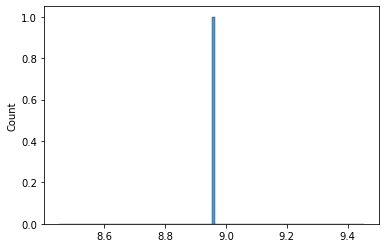

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=jet_mass.tolist(),bins=100)